In [2]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.io.shapereader as shpreader


import matplotlib.backends.backend_pdf as pdf
import matplotlib.font_manager as mfm
import matplotlib.patches as patches

In [3]:
# more setup
cm = 1/2.54
a4_landscape = (29.7*cm,21*cm)
a4_portrait = (21*cm,29.7*cm)
a5_landscape = (21*cm,14.8*cm)
a5_portrait = (14.8*cm,21*cm)

iceland_extent = (-25.356,-11.997,62.472,67.458)
capital_region_extent = (-22.769,-21.110, 63.729, 64.373)

fname = '/Users/odinndagur/Downloads/gadm36_ISL_shp/gadm36_ISL_2.shp'

In [4]:
# ignore unimportant warning that comes up
import warnings
from shapely.errors import ShapelyDeprecationWarning

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [5]:
# clean data and make a dataframe and bbox
import json
import numpy as np

with open('pools.json','r') as f:
    data = json.load(f)

for x in data:
    x['address'] = x['address'].strip()
    if(len(x['coordinates']) > 0):
        x['longitude'], x['latitude'] = float(x['coordinates'].split(',')[0]), float('-' + x['coordinates'].split(',')[1])

df = pd.DataFrame(data=data)

BBox = (df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max())


window extent:  TransformedBbox(
    Bbox(x0=0.29947313425768934, y0=0.125, x1=0.7255268657423106, y1=0.88),
    BboxTransformTo(
        TransformedBbox(
            Bbox(x0=0.0, y0=0.0, x1=10.0, y1=5.0),
            Affine2D().scale(72.0))))
original:  (-22.020174264907837, 64.10420702058816)
transform:  [  4425.7037529  -15307.72715448]
inverse of transform:  [-22.02017427  64.10420702]


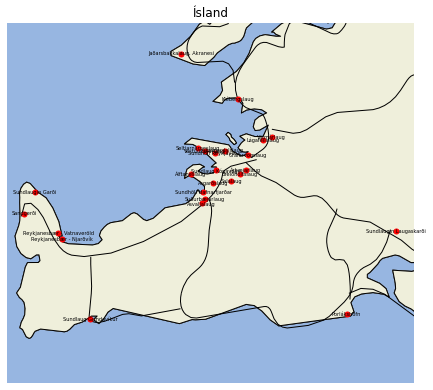

In [22]:
fig = plt.figure(figsize=a5_landscape)

# ax = fig.add_subplot(1,1,1,projection=ccrs.Mercator())
ax = plt.axes(projection=ccrs.Mercator())

# ax.set_global()
region_extent = capital_region_extent
ax.set_extent(region_extent, crs=ccrs.PlateCarree())
ax.set_title('Ísland')

# drop points from df if out of range of region_extent
# print(len(df))
# print(region_extent,df.latitude.min(),df.latitude.max(),df.longitude.min(),df.longitude.max())
# (-22.769, -21.11, 63.729, 64.373) 66.5393464707103 63.41745892482214 -13.688923893115202 -23.98793935775757
df = df.drop(df[(df.latitude < region_extent[0]) | (df.latitude > region_extent[1]) | (df.longitude < region_extent[2]) | (df.longitude > region_extent[3])].index)
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m', facecolor='none', name='coastline')
feature = ax.add_feature(coast, edgecolor='gray')

# ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='black', facecolor=cfeature.COLORS['land'])
ax.add_feature(land_50m)
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
ax.add_feature(rivers_50m,edgecolor='blue',facecolor='none')
ax.add_feature(cfeature.NaturalEarthFeature('cultural', 'roads', '10m',edgecolor='black',facecolor='none'))

# ax.gridlines()

glaciers = cfeature.NaturalEarthFeature(category='physical', name='glaciated_areas', scale='10m', facecolor='white')
ax.add_feature(glaciers)


# plot swimming pools as red dots
plt.plot(df['latitude'],df['longitude'],df['name'],
         color='red', marker='o',
         markersize=5,
         linestyle="None",
         transform=ccrs.Geodetic(),
         )

# print(df['latitude'],df['longitude'])
# print(ax.transData.transform((df['latitude'],df['longitude'])))

adm1_shapes = list(shpreader.Reader(fname).geometries())
# ax.add_geometries(adm1_shapes, ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=1)
# import matplotlib.patheffects as PathEffects

# print(len(df))
transform = ccrs.Mercator()._as_mpl_transform(ax)
for index, obj in df.iterrows():
    if(obj['longitude'] > 0):
        # print(obj)
        ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree())#, 
                        # path_effects=[PathEffects.withStroke(linewidth=5, foreground="k", alpha=.8)])
        # ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=15, ha='center', va='center', transform=transform)

plt.gca().set_axis_off()
fig.set_clip_box(ax.get_window_extent())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
plt.margins(0,0)
plt.savefig('island-vegir.svg',pad_inches = 0, bbox_inches='tight')
plt.show()

In [32]:
def create_map(region_extent=iceland_extent,title='Ísland',name='sundkort'):
    global df
    fig = plt.figure(figsize=(a4_landscape))
    ax = plt.axes(projection=ccrs.Mercator())
    plt.rcParams['svg.fonttype'] = 'none'

    ax.set_extent(region_extent, crs=ccrs.PlateCarree())
    ax.set_title(title)
    ax.coastlines()

    # drop points from df if out of range of region_extent
    df = df.drop(df[(df.latitude < region_extent[0]) | (df.latitude > region_extent[1]) | (df.longitude < region_extent[2]) | (df.longitude > region_extent[3])].index)
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m', facecolor='none', name='coastline', edgecolor='black')
    land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='black', facecolor='none')# facecolor=cfeature.COLORS['land'])
    rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor='blue',facecolor='none')
    glaciers = cfeature.NaturalEarthFeature(category='physical', name='glaciated_areas', scale='10m', edgecolor='white',facecolor='none')
    roads = cfeature.NaturalEarthFeature('cultural', 'roads', '10m',edgecolor='red',facecolor='none')

    ax.add_feature(rivers_50m)
    ax.add_feature(roads)
    ax.add_feature(cartopy.feature.OCEAN,edgecolor='blue',facecolor='none')
    # ax.add_feature(cartopy.feature.LAND, edgecolor='black')
    ax.add_feature(land_50m)
    ax.add_feature(glaciers)


    # plot swimming pools as red dots
    plt.plot(df['latitude'],df['longitude'],df['name'],
            color='red', marker='o',
            markersize=5,
            linestyle="None",
            transform=ccrs.Geodetic(),
            )

    #pool names
    transform = ccrs.Mercator()._as_mpl_transform(ax)
    print('transform: ',transform)
    for index, obj in df.iterrows():
        if(obj['longitude'] > 0):
            ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree())#, 

    # plt.gca().set_axis_off() #to remove border

    fig.set_clip_box(ax.get_window_extent())
    plt.savefig('{}.svg'.format(name))
    plt.show()

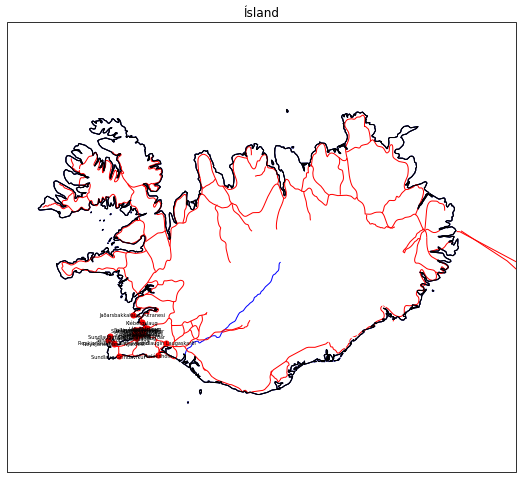

In [34]:
fig = plt.figure(figsize=(a4_landscape))
ax = plt.axes(projection=ccrs.Mercator())
plt.rcParams['svg.fonttype'] = 'none'

region_extent = iceland_extent
ax.set_extent(region_extent, crs=ccrs.PlateCarree())
ax.set_title('Ísland')
ax.coastlines()

# drop points from df if out of range of region_extent
df = df.drop(df[(df.latitude < region_extent[0]) | (df.latitude > region_extent[1]) | (df.longitude < region_extent[2]) | (df.longitude > region_extent[3])].index)
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m', facecolor='none', name='coastline', edgecolor='black')
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='black', facecolor='none')# facecolor=cfeature.COLORS['land'])
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m',edgecolor='blue',facecolor='none')
glaciers = cfeature.NaturalEarthFeature(category='physical', name='glaciated_areas', scale='10m', edgecolor='white',facecolor='none')
roads = cfeature.NaturalEarthFeature('cultural', 'roads', '10m',edgecolor='red',facecolor='none')

ax.add_feature(rivers_50m)
ax.add_feature(roads)
ax.add_feature(cartopy.feature.OCEAN,edgecolor='blue',facecolor='none')
# ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(land_50m)
ax.add_feature(glaciers)


# plot swimming pools as red dots
plt.plot(df['latitude'],df['longitude'],df['name'],
         color='red', marker='o',
         markersize=5,
         linestyle="None",
         transform=ccrs.Geodetic(),
         )

#pool names
transform = ccrs.Mercator()._as_mpl_transform(ax)
for index, obj in df.iterrows():
    if(obj['longitude'] > 0):
        ax.text(obj['latitude'],obj['longitude'], obj['name'], color='black', size=5, ha='center', va='center', transform=ccrs.PlateCarree())#, 

# plt.gca().set_axis_off() #to remove border

fig.set_clip_box(ax.get_window_extent())
plt.savefig('island-allt.svg')
plt.show()

transform:  CompositeGenericTransform(
    < InterProjectionTransform <cartopy.crs.Mercator object at 0x1adf46b30> -> <cartopy.crs.Mercator object at 0x1a4099130> >,
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=-2868591.9582518665, y0=10039979.210939059, x1=-2683912.9230258255, y1=10223664.328502601),
                    TransformWrapper(
                        BlendedAffine2D(
                            IdentityTransform(),
                            IdentityTransform())))),
            BboxTransformTo(
                TransformedBbox(
                    Bbox(x0=0.125, y0=0.125, x1=0.9, y1=0.88),
                    BboxTransformTo(
                        TransformedBbox(
                            Bbox(x0=0.0, y0=0.0, x1=11.69291338582677

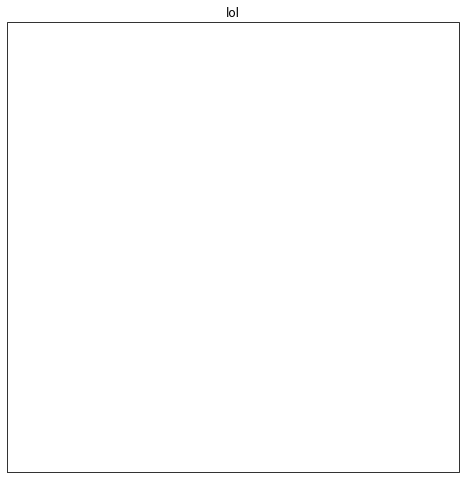

In [40]:
xt = capital_region_extent
# x = (xt[0]-3, xt[1]-3, xt[2]+3, xt[3]+3)
# print(x)
create_map(region_extent=x,title='lol',name='nettinetti')